In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

**Load a csv file**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Dataset_Project.csv')

focuses on-understanding customer churn in a financial services company

Is to be prediction whether a customer will continue their association with the bank or choose to close their account.commonly known as churn.

**Summary of a DataFrame**

1. **CreditScore**:This represents the credit score of the customer. A higher credit score indicates better creditworthiness and a lower risk of default. It is typically a value between 300 and 850.
2. **Age**:The age of the customer. It can affect customer behavior, as younger or older customers may have different spending patterns, needs, or loyalty to the bank.
3. **Tenure**:The number of years the customer has been with the bank. A longer tenure might indicate customer loyalty.
4. **Balance**:The customer’s account balance. It represents how much money the customer has deposited in their account with the bank.
5. **NumOfProducts**:The number of products (like loans, credit cards, etc.) that the customer has purchased from the bank
6. **HasCrCard**:A flag that indicates whether the customer has a credit card
7. **IsActiveMember**:A flag that indicates whether the customer is an active member
8. **EstimatedSalary**:The estimated annual salary of the customer.
9. **Geography_Germany**:This is a dummy variable indicating if the customer is from Germany (1 = Yes, 0 = No).
10. **Geography_Spain**:This is a dummy variable indicating if the customer is from Spain (1 = Yes, 0 = No).
11. **Gender_Male**: A dummy variable indicating the gender of the customer (1 = Male, 0 = Female).



In [3]:
df

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20624,20624,754,30.0,9,0.00,1,0.0,1.0,189641.11,0,0,1,1
20625,20625,729,40.0,2,0.00,2,1.0,0.0,60552.51,0,0,0,0
20626,20626,465,32.0,6,0.00,2,1.0,0.0,95500.98,0,0,0,0
20627,20627,679,41.0,8,0.00,2,1.0,0.0,186884.04,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20629 entries, 0 to 20628
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20629 non-null  int64  
 1   CreditScore        20629 non-null  int64  
 2   Age                20629 non-null  float64
 3   Tenure             20629 non-null  int64  
 4   Balance            20629 non-null  float64
 5   NumOfProducts      20629 non-null  int64  
 6   HasCrCard          20629 non-null  float64
 7   IsActiveMember     20629 non-null  float64
 8   EstimatedSalary    20629 non-null  float64
 9   Exited             20629 non-null  int64  
 10  Geography_Germany  20629 non-null  int64  
 11  Geography_Spain    20629 non-null  int64  
 12  Gender_Male        20629 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.0 MB


**Drop the Column 'ID'**

In [5]:
df.drop(['id'],axis=1,inplace=True)
print(df)

       CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0              668  33.0       3       0.00              2        1.0   
1              627  33.0       1       0.00              2        1.0   
2              678  40.0      10       0.00              2        1.0   
3              581  34.0       2  148882.54              1        1.0   
4              716  33.0       5       0.00              2        1.0   
...            ...   ...     ...        ...            ...        ...   
20624          754  30.0       9       0.00              1        0.0   
20625          729  40.0       2       0.00              2        1.0   
20626          465  32.0       6       0.00              2        1.0   
20627          679  41.0       8       0.00              2        1.0   
20628          537  44.0       9       0.00              2        1.0   

       IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                 0.0        181449.97       0        

**Check any Missing Values**

In [6]:
df.isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0
Geography_Germany,0


**Check the datatype of each column**

In [7]:
df.dtypes

,0
CreditScore,int64
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,float64
IsActiveMember,float64
EstimatedSalary,float64
Exited,int64
Geography_Germany,int64


In [8]:
import warnings
warnings.filterwarnings('ignore')

It shows how the count of active members varies across different age groups

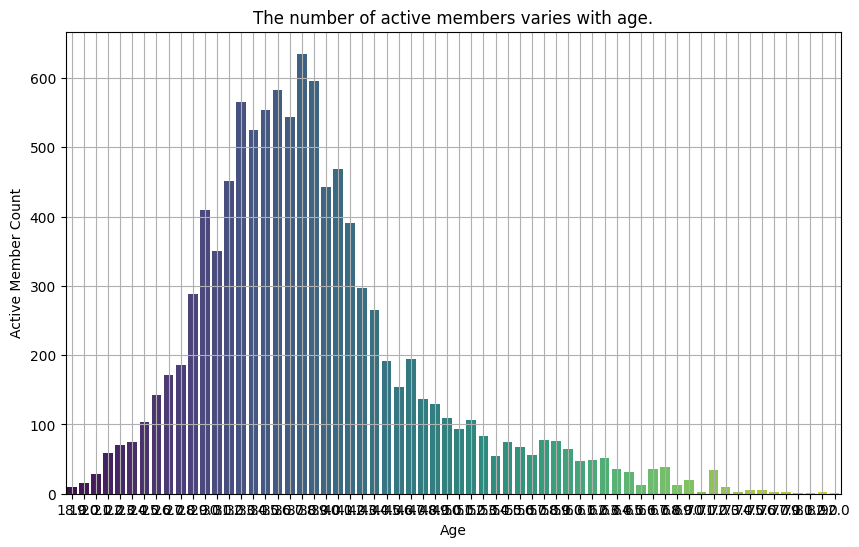

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='IsActiveMember', data=df, estimator=sum, ci=None, palette='viridis')
plt.title("The number of active members varies with age.")
plt.xlabel("Age")
plt.ylabel("Active Member Count")
plt.grid(True)
plt.show()

how age relates to no.of year status

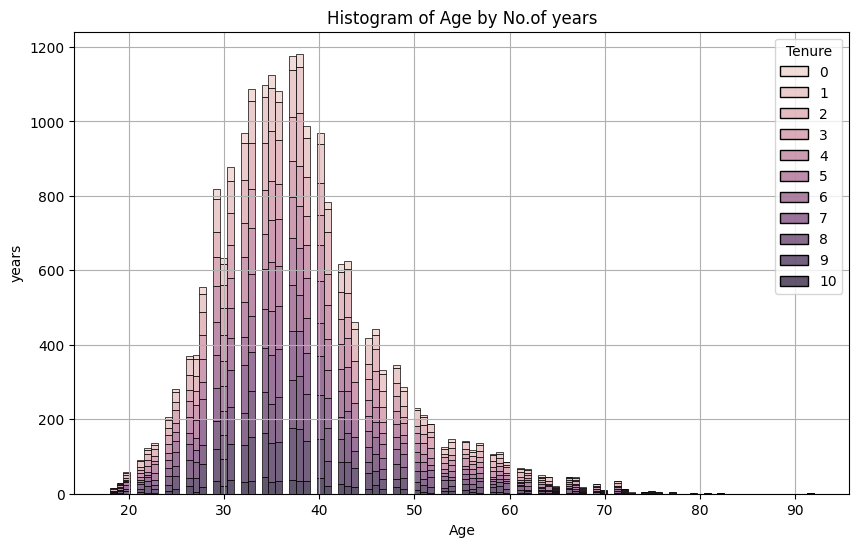

In [10]:
# Create a histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Tenure',multiple="stack")

# Add labels and title
plt.title("Histogram of Age by No.of years")
plt.xlabel("Age")
plt.ylabel("years")
plt.grid(True)

# Show the plot
plt.show()

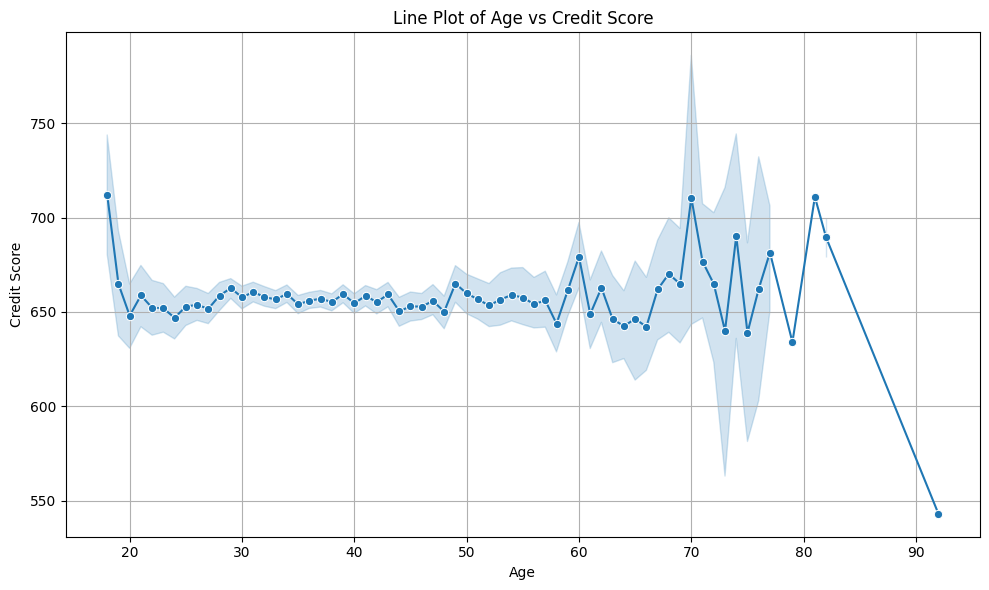

In [11]:
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='CreditScore', data=df, marker='o')

# Add labels and title
plt.title("Line Plot of Age vs Credit Score")
plt.xlabel("Age")
plt.ylabel("Credit Score")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Prepare Features**

In [12]:
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11]]
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
20624,754,30.0,9,0.00,1,0.0,1.0,189641.11,0,1,1
20625,729,40.0,2,0.00,2,1.0,0.0,60552.51,0,0,0
20626,465,32.0,6,0.00,2,1.0,0.0,95500.98,0,0,0
20627,679,41.0,8,0.00,2,1.0,0.0,186884.04,0,0,0


**Prepare Target**

In [13]:
y=df['Exited']
y

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
20624,0
20625,0
20626,0
20627,0


**Scaled the Features**

In [14]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.636     , 0.2027027 , 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.554     , 0.2027027 , 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.656     , 0.2972973 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.23      , 0.18918919, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.658     , 0.31081081, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.374     , 0.35135135, 0.9       , ..., 0.        , 0.        ,
        0.        ]])

**Split the Data**

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=8)

**Create a models**

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=8)


In [17]:
models=[knn,sv,nb,dt,rf]
lst=[]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  acc=(accuracy_score(y_pred,y_test)*100)
  lst.append(acc)
  print(model,classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=3)               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4868
           1       0.61      0.45      0.52      1321

    accuracy                           0.82      6189
   macro avg       0.74      0.69      0.71      6189
weighted avg       0.81      0.82      0.81      6189

SVC()               precision    recall  f1-score   support

           0       0.85      0.97      0.91      4868
           1       0.78      0.38      0.51      1321

    accuracy                           0.85      6189
   macro avg       0.82      0.68      0.71      6189
weighted avg       0.84      0.85      0.82      6189

GaussianNB()               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4868
           1       0.56      0.45      0.50      1321

    accuracy                           0.81      6189
   macro avg       0.71      0.68      0.69      6189
weighted avg       

Text(0, 0.5, 'Accuracy')

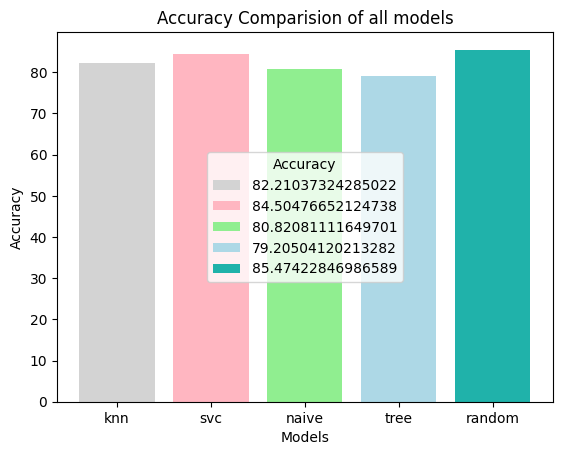

In [18]:
models=['knn','svc','naive','tree','random']
colors = ['lightgray', 'lightpink', 'lightgreen','lightblue','lightSeaGreen']
bar_labels = []
for i in lst:
   bar_labels.append(i)
plt.bar(models,lst,color=colors,label=bar_labels)
plt.legend(title='Accuracy',loc='center')
plt.title('Accuracy Comparision of all models')
plt.xlabel("Models")
plt.ylabel("Accuracy")

so, choose the RandomForestClassifier for Predictions ,---it builds a multitude of decision trees during training and merges their outputs to improve accuracy.

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_split=2,min_samples_leaf=1)

In [20]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predict the result**

In [21]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [22]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.8550654386815317


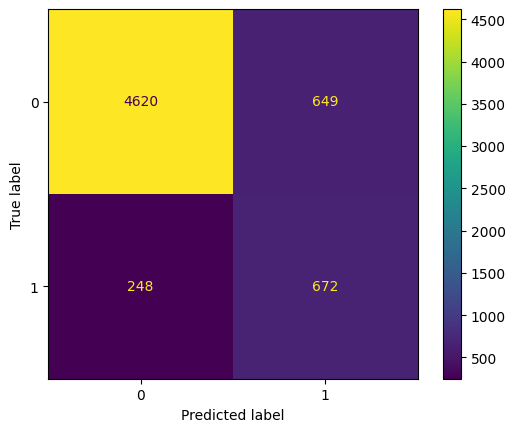

In [23]:
print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

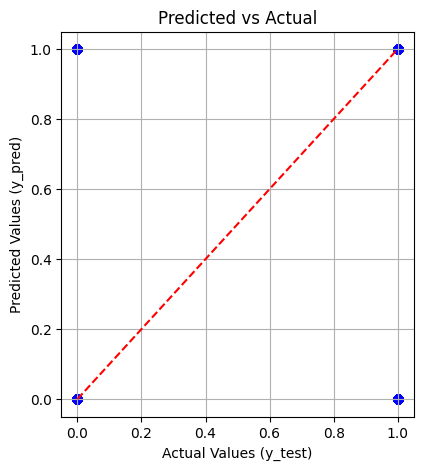

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Reference line y=x
plt.title("Predicted vs Actual")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.grid()

**Over Sampling**

In [25]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [26]:
y_os.value_counts()

,count
Exited,
0,16344
1,16344


In [27]:
X_os_scaled=scaler.fit_transform(X_os)
X_os_scaled

array([[0.636     , 0.2027027 , 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.554     , 0.2027027 , 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.656     , 0.2972973 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.75      , 0.47359275, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.836     , 0.40528657, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.646     , 0.35326206, 0.3       , ..., 1.        , 0.        ,
        0.        ]])

In [28]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=1)

**Hyperparameter Tuning using GridSearchCV**

In [29]:

from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],      #The number of trees in the forest
    'max_depth': [10, 20, 30],            #Maximum depth of each tree.
    'min_samples_split': [2, 5, 10],      #Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4]         #Minimum number of samples that must be present in a leaf node.
}

In [31]:
grid_search = GridSearchCV(estimator=model,          ##This specifies the machine learning model that you want to optimize.
                           param_grid=param_grid,
                           cv=3,                     #This defines the number of cross-validation folds to use.
                           scoring='accuracy',       #the model's performance will be measured based on the accuracy
                           n_jobs=-1)                #CPU cores will be used to perform the grid search in parallel,




In [32]:
grid_search.fit(X_train_os, y_train_os)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [33]:
# Display the best parameters found
print("Best parameters found by GridSearchCV:", grid_search.best_params_)


Best parameters found by GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_os, y_test_os)
print("Test accuracy of the best model:", (test_score)*100)

Test accuracy of the best model: 89.12001631487712


**Correlation**-which helps determine the relationships between the input features and the target variable

In [35]:
X.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.000737,-0.009087,-0.000772,0.016118,-0.007663,0.005511,-0.001052,0.000183,0.002309,0.003516
Age,-0.000737,1.000000,-0.016113,0.067388,-0.111828,-0.015252,0.000423,-0.009034,0.096450,-0.014408,-0.069480
Tenure,-0.009087,-0.016113,1.000000,-0.025930,0.010088,0.002743,-0.003134,0.008060,-0.013427,0.003733,0.022530
Balance,-0.000772,0.067388,-0.025930,1.000000,-0.356710,-0.026204,-0.007944,-0.002921,0.539763,-0.134210,-0.020909
NumOfProducts,0.016118,-0.111828,0.010088,-0.356710,1.000000,0.011465,0.039128,0.007156,-0.097018,0.028921,0.028013
HasCrCard,-0.007663,-0.015252,0.002743,-0.026204,0.011465,1.000000,-0.026287,0.006288,-0.005594,-0.014853,0.004055
IsActiveMember,0.005511,0.000423,-0.003134,-0.007944,0.039128,-0.026287,1.000000,-0.005536,-0.033575,0.017732,0.037002
EstimatedSalary,-0.001052,-0.009034,0.008060,-0.002921,0.007156,0.006288,-0.005536,1.000000,0.001506,-0.007250,-0.001378
Geography_Germany,0.000183,0.096450,-0.013427,0.539763,-0.097018,-0.005594,-0.033575,0.001506,1.000000,-0.267697,-0.053122
Geography_Spain,0.002309,-0.014408,0.003733,-0.134210,0.028921,-0.014853,0.017732,-0.007250,-0.267697,1.000000,0.012863


In [36]:
X.drop(['Gender_Male'],axis=1,inplace=True)
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...
20624,754,30.0,9,0.00,1,0.0,1.0,189641.11,0,1
20625,729,40.0,2,0.00,2,1.0,0.0,60552.51,0,0
20626,465,32.0,6,0.00,2,1.0,0.0,95500.98,0,0
20627,679,41.0,8,0.00,2,1.0,0.0,186884.04,0,0


**Feature Selection**

In [37]:
X_new=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=1)
rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_split=2,min_samples_leaf=1)
rf_model_2.fit(X_train_os, y_train_os)
y_pred1=rf_model_2.predict(X_test_os)
print(classification_report(y_pred1,y_test_os))



              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5131
           1       0.87      0.90      0.89      4676

    accuracy                           0.89      9807
   macro avg       0.89      0.89      0.89      9807
weighted avg       0.89      0.89      0.89      9807




**In conclusion, the Random Forest classifier, tuned using GridSearchCV and optimized with feature selection, achieved an accuracy of 89%, making it the best model for predicting customer churn in this bank churn project. This model effectively balances performance and interpretability, ensuring reliable predictions for business decision-making.**

**Predict the new value**

In [38]:
y_new=rf_model.predict([[668	,33.0	,3,	0.00,	2,	1.0	,0.0,	181449.97,	0,	0,1]])
if y_new==0:
  print("Account Activated")
else:
  print("Account will Exited")

Account will Exited


In [39]:
import pickle
pickle.dump(rf_model_2,open('model.sav','wb'))

In [40]:
pickle.dump(scaler,open('scaler.sav','wb'))